In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json
import logging
from marshaltools import ProgramList
from astropy.time import Time
import astropy.units as u
import os

from Observatory import Observatory
from utils import get_config, plot_visibility, prepare_snifs_schedule

In [37]:
# If you are running this notebook for the first time, you will be prompted to enter your username and
# the path to your downloads from slack. If you entered something incorrectly, you can correct this in .config
config = get_config()

username = config['username']
date = '2018-10-01'
obs = 'ntt'
tshift = {'ntt': -0.25, 'uh88': 0}  # In units of days
trange = [Time(Time(date).jd+tshift[obs],format='jd'), Time(Time(date).jd+1.+tshift[obs],format='jd')]

logpath = 'logs/'

# log
logger = logging.getLogger(username)
handler = logging.FileHandler(os.path.join(logpath, 'ztfcosmo_visibilty_%s_%s_%s.log'%(obs,date,username)))
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

In [40]:
observatories ={
    'uh88': Observatory('uh88', 19.8231, -155.47, 4205, sun_alt_th=-17, logger=logger),
    'ntt': Observatory('ntt', -29.25, -70.73, 2375, sun_alt_th=-12, logger=logger), # What's the twilight limit for ePESSTO?
}

INFO:jnordin:Initialized Observatory uh88 at position (lon 19.82 deg, lat -155.47 deg, alt: 4205.0 m)
INFO:jnordin:Initialized Observatory ntt at position (lon -29.25 deg, lat -70.73 deg, alt: 2375.0 m)


In [41]:
pl = ProgramList('AMPEL Test')

targets = json.load(open('sne_following.json'))

INFO:marshaltools.ProgramList:Initialized ProgramList for program AMPEL Test (ID 4)
INFO:marshaltools.ProgramList:Loaded 214 saved sources for program AMPEL Test.


In [42]:
# Calculate dark time and observation windows

dark_time = observatories[obs].get_dark_times(trange)

obs_windows = {}
for snname in targets.keys():
    ra = pl.sources[snname]['ra']
    dec = pl.sources[snname]['dec']
    logger.info('Calculating visibility of source %s (ra: %f, dec: %f) with %s.'%(snname, ra, dec, obs))
    obs_w = observatories[obs].compute_visibility(ra, dec, trange)
    if len(obs_w['visible']) > 0:
        obs_windows[snname] = obs_w
    else:
        logger.info('Source %s (ra: %f, dec: %f) not observable with %s.'%(snname, ra, dec, obs))

INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:Calculating visibility of source ZTF18abcqvhs (ra: 301.674905, dec: 37.783455) with ntt.
INFO:jnordin:computing visibility of source at (ra: 301.674905, dec: 37.783455) from observatory ntt
INFO:jnordin:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -12.00 deg
					-Moon distance: 30.00 deg
INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:source is visible for a total of 0.000 hours. Took 6.39e-01 sec
INFO:jnordin:Source ZTF18abcqvhs (ra: 301.674905, dec: 37.783455) not observable with ntt.
INFO:jnordin:Calculating visibility of source ZTF18abnujuy (ra: 330.124841, dec: 43.553731) with ntt.
INFO:jnordin:computing visibility of source at (ra: 330.124841, dec: 43.553731) from

INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:source is visible for a total of 3.250 hours. Took 6.40e-01 sec
INFO:jnordin:Calculating visibility of source ZTF18abuluko (ra: 349.135362, dec: 33.447221) with ntt.
INFO:jnordin:computing visibility of source at (ra: 349.135362, dec: 33.447221) from observatory ntt
INFO:jnordin:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -12.00 deg
					-Moon distance: 30.00 deg
INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:source is visible for a total of 0.000 hours. Took 6.66e-01 sec
INFO:jnordin:Source ZTF18abuluko (ra: 349.135362, dec: 33.447221) not observable with ntt.
INFO:jnordin:Calculating visibility of source ZTF18aburkuo (ra: 322.388385, dec: 24.898952) with ntt.
INFO:jn

INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:source is visible for a total of 0.000 hours. Took 6.08e-01 sec
INFO:jnordin:Source ZTF18abxygvv (ra: 293.846132, dec: 64.758349) not observable with ntt.
INFO:jnordin:Calculating visibility of source ZTF18abwlejr (ra: 98.393554, dec: 21.166290) with ntt.
INFO:jnordin:computing visibility of source at (ra: 98.393554, dec: 21.166290) from observatory ntt
INFO:jnordin:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -12.00 deg
					-Moon distance: 30.00 deg
INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:Too close the the moon.
INFO:jnordin:source is visible for a total of 0.000 hours. Took 6.20e-01 sec
INFO:jnordin:Source ZTF18abwlejr (ra: 98.393554, dec: 21.166290) not obser

INFO:jnordin:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -12.00 deg
					-Moon distance: 30.00 deg
INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:source is visible for a total of 0.000 hours. Took 6.13e-01 sec
INFO:jnordin:Source ZTF18aaupjtd (ra: 288.703620, dec: 65.525847) not observable with ntt.
INFO:jnordin:Calculating visibility of source ZTF18ablruzq (ra: 284.338311, dec: 11.433452) with ntt.
INFO:jnordin:computing visibility of source at (ra: 284.338311, dec: 11.433452) from observatory ntt
INFO:jnordin:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -12.00 deg
					-Moon distance: 30.00 deg
INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:source is 

INFO:jnordin:Too close the the moon.
INFO:jnordin:source is visible for a total of 0.000 hours. Took 6.10e-01 sec
INFO:jnordin:Source ZTF18abvtrnc (ra: 92.848330, dec: 43.734964) not observable with ntt.
INFO:jnordin:Calculating visibility of source ZTF17aabihdn (ra: 81.603904, dec: 40.110447) with ntt.
INFO:jnordin:computing visibility of source at (ra: 81.603904, dec: 40.110447) from observatory ntt
INFO:jnordin:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -12.00 deg
					-Moon distance: 30.00 deg
INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:Too close the the moon.
INFO:jnordin:source is visible for a total of 0.000 hours. Took 6.02e-01 sec
INFO:jnordin:Source ZTF17aabihdn (ra: 81.603904, dec: 40.110447) not observable with ntt.


In [43]:
additional_names = ['ZTF18abvxqtp']
for snname in additional_names:
    ra = pl.sources[snname]['ra']
    dec = pl.sources[snname]['dec']
    logger.info('Calculating visibility of source %s (ra: %f, dec: %f) with %s.'%(snname, ra, dec, obs))
    obs_w = observatories[obs].compute_visibility(ra, dec, trange)
    if len(obs_w['visible']) > 0:
        obs_windows[snname] = obs_w
    else:
        logger.info('Source %s (ra: %f, dec: %f) not observable with %s.'%(snname, ra, dec, obs))

INFO:jnordin:Calculating visibility of source ZTF18abvxqtp (ra: 359.370147, dec: -6.603815) with ntt.
INFO:jnordin:computing visibility of source at (ra: 359.370147, dec: -6.603815) from observatory ntt
INFO:jnordin:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -12.00 deg
					-Moon distance: 30.00 deg
INFO:jnordin:computed dark times (sun_alt: -12.00) between 2018-09-30 18:00:00.000 and 2018-10-01 17:55:00.000. Total of 9.83 hours of dark
INFO:jnordin:source is visible for a total of 8.167 hours. Took 6.65e-01 sec


In [44]:
print('%i of %i targets are observable with %s.'%(len(obs_windows.keys()), len(targets)+len(additional_names), obs))

23 of 54 targets are observable with ntt.


In [57]:
# Manual list of SNe to be exluded because they are already in the queue for SEDM
exclude = []
# Current SEDM/Marshal list
foo = '''ZTF18abcqvhs, ZTF18abscygs, ZTF18ablllyw, ZTF18abthaii, ZTF18abtswjk, ZTF18abwfmot, ZTF18absoomk, ZTF18abvnwzz, ZTF18abtxvhy, ZTF18abvfecb, ZTF18abwktmm, ZTF18abxyudf, ZTF18abxwiqz, ZTF18abxbhov, ZTF18abvtrnc, ZTF18abvxqtp'''
exclude.extend( foo.split(', ') )
# SNIFS observed
foo = '''ZTF18abvxqtp
ZTF18abuksxd
ZTF18abwlpzf
ZTF18aburkuo
ZTF18absgvqb
ZTF18abuicad
ZTF18abuioue
ZTF18abtghbi
ZTF18abwkxgo
ZTF18abvrgjc
ZTF18abwbtco'''
exclude.extend( foo.split('\n') )
print(exclude)

['ZTF18abcqvhs', 'ZTF18abscygs', 'ZTF18ablllyw', 'ZTF18abthaii', 'ZTF18abtswjk', 'ZTF18abwfmot', 'ZTF18absoomk', 'ZTF18abvnwzz', 'ZTF18abtxvhy', 'ZTF18abvfecb', 'ZTF18abwktmm', 'ZTF18abxyudf', 'ZTF18abxwiqz', 'ZTF18abxbhov', 'ZTF18abvtrnc', 'ZTF18abvxqtp', 'ZTF18abvxqtp', 'ZTF18abuksxd', 'ZTF18abwlpzf', 'ZTF18aburkuo', 'ZTF18absgvqb', 'ZTF18abuicad', 'ZTF18abuioue', 'ZTF18abtghbi', 'ZTF18abwkxgo', 'ZTF18abvrgjc', 'ZTF18abwbtco']


In [58]:

# Sort the SNe by time of lowest airmass etc
snnames = [k for k in obs_windows.keys() if k not in exclude]

# Sort by end of visibility
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][-1])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by start of visibility
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][0])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by time of best airmass
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][obs_windows[a]['airmass'] == min(obs_windows[a]['airmass'])])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by priority (For now number of "Very Good" by last three scanners, should be refined)
f_sort = lambda a: (3 - len([b for b in targets[a][-3:] if b[0] == 'VeryGood']) if a in targets.keys() else 4)
snnames = sorted(snnames, key=f_sort)
priorities = [f_sort(a) for a in snnames]

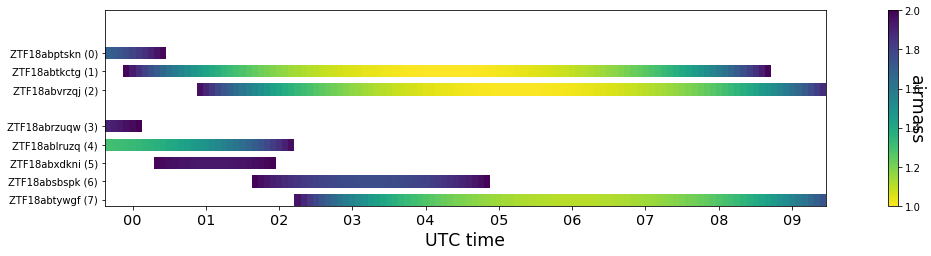

In [59]:
_ = plot_visibility(snnames, obs_windows, dark_time, priorities)

3 SNe selected


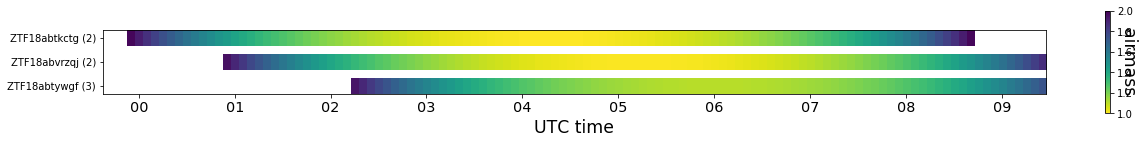

In [60]:
selected = [1,2,7]
# Set manual priorities if you wish
prio_new = []
print('%i SNe selected'%len(selected))

snnames_selected = [snnames[k] for k in selected]
priorities_selected = [priorities[k] for k in selected]

sort_again = True
if sort_again:
    # sort them by time of lowest airmass again
    f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][obs_windows[a]['airmass'] == min(obs_windows[a]['airmass'])])[0][0]
    if len(prio_new) < len(selected):
        tmp = sorted(zip(snnames_selected, priorities_selected) , key=lambda a: f_sort(a[0]))
    else:
        tmp = sorted(zip(snnames_selected, prio_new) , key=lambda a: f_sort(a[0]))
    snnames_selected = [a[0] for a in tmp]
    priorities_selected = [a[1] for a in tmp]

_ = plot_visibility(snnames_selected, obs_windows, dark_time, priorities_selected, labeltype='priority')
plt.savefig('snifs/targets_snifs_%s.png'%date)

In [55]:
# SANITY CHECK!
# For the beginning it might be good to double check the selected targets on the marshal.
for k in selected:
    print('Please double check whether target %i (%s, priority %i) is a good target:'%(k, snnames[k], priorities[k]))
    print('http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=%s'%snnames[k])

Please double check whether target 1 (ZTF18abtkctg, priority 2) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abtkctg
Please double check whether target 2 (ZTF18abvrzqj, priority 2) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abvrzqj
Please double check whether target 7 (ZTF18abtywgf, priority 3) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abtywgf


In [26]:
if obs == 'uh88':
    snnames_out = [snnames[k] for k, p in sorted(zip(selected, prio_new), key=lambda a: a[1])]
    prepare_snifs_schedule(snnames_out, pl.sources, obs_windows, date, logger=logger)